## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# Correção para carregar o conjunto de dados 'load_boston' pois foi removido do scikit-learn devido a preocupações éticas,
# e definição explítica dos nomes das colunas pois a referência 'boston.feature_names' também não está mais disponível.

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [8]:
# Separação dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Criando o regressor de árvore de decisão
regressor = DecisionTreeRegressor(random_state=42)

# Treinando o regressor
regressor.fit(X_train, y_train)

print("A árvore de regressão foi treinada!")

A árvore de regressão foi treinada!


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
# Calculando os alfas de complexidade de custo (CCP Alphas) para uma árvore de decisão em scikit-learn,
# usando o método cost_complexity_pruning_path.

path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print("CCP Alphas:")
print(ccp_alphas)

CCP Alphas:
[0.00000000e+00 3.51753830e-17 1.40701532e-16 1.40701532e-16
 5.62806127e-16 5.62806127e-16 5.62806127e-16 5.62806127e-16
 1.12561225e-15 1.68841838e-15 2.02610206e-14 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.65016502e-05 1.65016502e-05 3.71287129e-05
 3.71287129e-05 3.71287129e-05 3.71287129e-05 3.71287129e-05
 3.71287129e-05 4.95049505e-05 4.95049505e-05 4.95049505e-05
 4.95049505e-05 4.95049505e-05 4.95049505e-05 4.95049505e-05
 4.95049505e-05 4.95049505e-05 4.95049505e-05 4.95049505e-05
 6.60066007e-05 1.01072607e-04 1.03135314e-04 1.03135314e-04
 1.03135314e

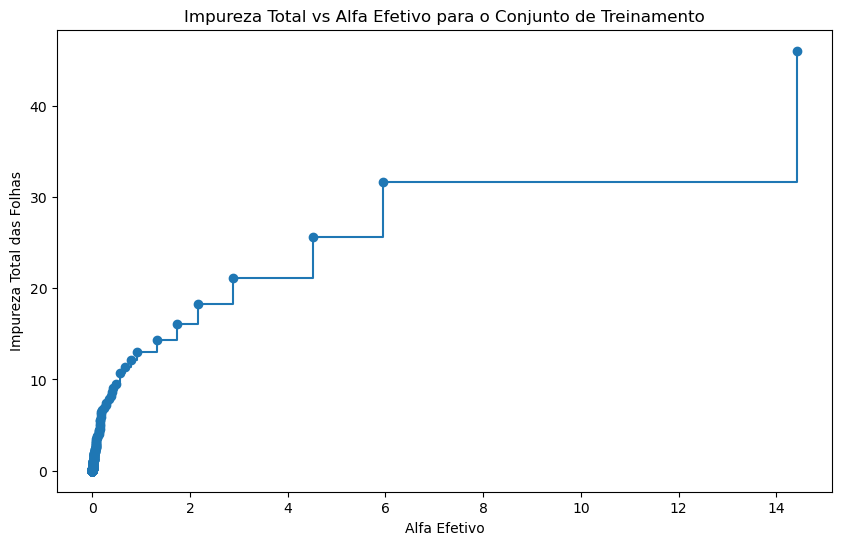

In [13]:
# Visualizando como as impurezas mudam com diferentes valores de alfa, plotando ccp_alphas contra impurities.

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Alfa Efetivo")
plt.ylabel("Impureza Total das Folhas")
plt.title("Impureza Total vs Alfa Efetivo para o Conjunto de Treinamento")
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [14]:
trees = []  # Lista para armazenar as árvores

for alpha in ccp_alphas:
    # Treinar a árvore com o ccp_alpha atual
    dtree = DecisionTreeRegressor(ccp_alpha=alpha)
    dtree.fit(X_train, y_train)
    
    # Adicionar a árvore treinada à lista
    trees.append(dtree)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [15]:
from sklearn.metrics import mean_squared_error

mse_train_values = []
mse_test_values = []

for dtree in trees:
    # Previsões
    train_preds = dtree.predict(X_train)
    test_preds = dtree.predict(X_test)
    
    # Cálculo do MSE
    mse_train = mean_squared_error(y_train, train_preds)
    mse_test = mean_squared_error(y_test, test_preds)
    
    # Adicionando os valores às listas
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Imprimir os MSEs
for alpha, mse_train, mse_test in zip(ccp_alphas, mse_train_values, mse_test_values):
    print(f"CCP alpha: {alpha:.5f}, MSE Treinamento: {mse_train:.2f}, MSE Teste: {mse_test:.2f}")

CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 11.32
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 12.40
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 11.39
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 12.31
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 18.13
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 9.81
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 23.30
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 21.10
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 11.06
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 11.23
CCP alpha: 0.00000, MSE Treinamento: 0.00, MSE Teste: 11.18
CCP alpha: 0.00001, MSE Treinamento: 0.00, MSE Teste: 10.15
CCP alpha: 0.00001, MSE Treinamento: 0.00, MSE Teste: 11.07
CCP alpha: 0.00001, MSE Treinamento: 0.00, MSE Teste: 10.55
CCP alpha: 0.00001, MSE Treinamento: 0.00, MSE Teste: 9.10
CCP alpha: 0.00001, MSE Treinamento: 0.00, MSE Teste: 10.50
CCP alpha: 0.00001, MSE Treinamento: 0.00,

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

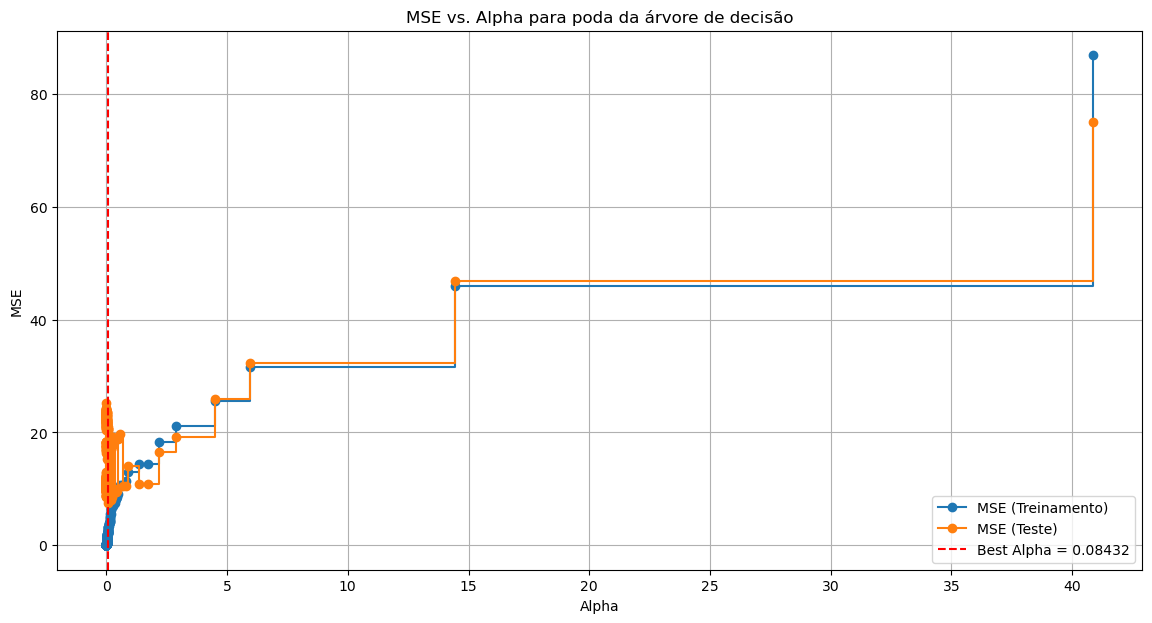

In [16]:
plt.figure(figsize=(14,7))

# Plotando os valores de MSE
plt.plot(ccp_alphas, mse_train_values, marker='o', label='MSE (Treinamento)', drawstyle="steps-post")
plt.plot(ccp_alphas, mse_test_values, marker='o', label='MSE (Teste)', drawstyle="steps-post")

# Identificando o mínimo MSE de teste e seu respectivo alpha
idx_min_mse_test = np.argmin(mse_test_values)
best_alpha = ccp_alphas[idx_min_mse_test]
plt.axvline(x=best_alpha, linestyle='--', color='red', label=f'Best Alpha = {best_alpha:.5f}')

# Ajustando o gráfico
plt.title("MSE vs. Alpha para poda da árvore de decisão")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [17]:
from sklearn.metrics import r2_score

# Treinando a árvore com o melhor alpha
best_tree = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=0)
best_tree.fit(X_train, y_train)

# Fazendo as previsões com a árvore otimizada
predictions_best_tree = best_tree.predict(X_test)

# Calculando o R^2
r2_best_tree = r2_score(y_test, predictions_best_tree)
print(f"R-quadrado para a árvore com alpha = {best_alpha:.5f}: {r2_best_tree:.4f}")

R-quadrado para a árvore com alpha = 0.08432: 0.8972


### 7. Visualize esta árvore.

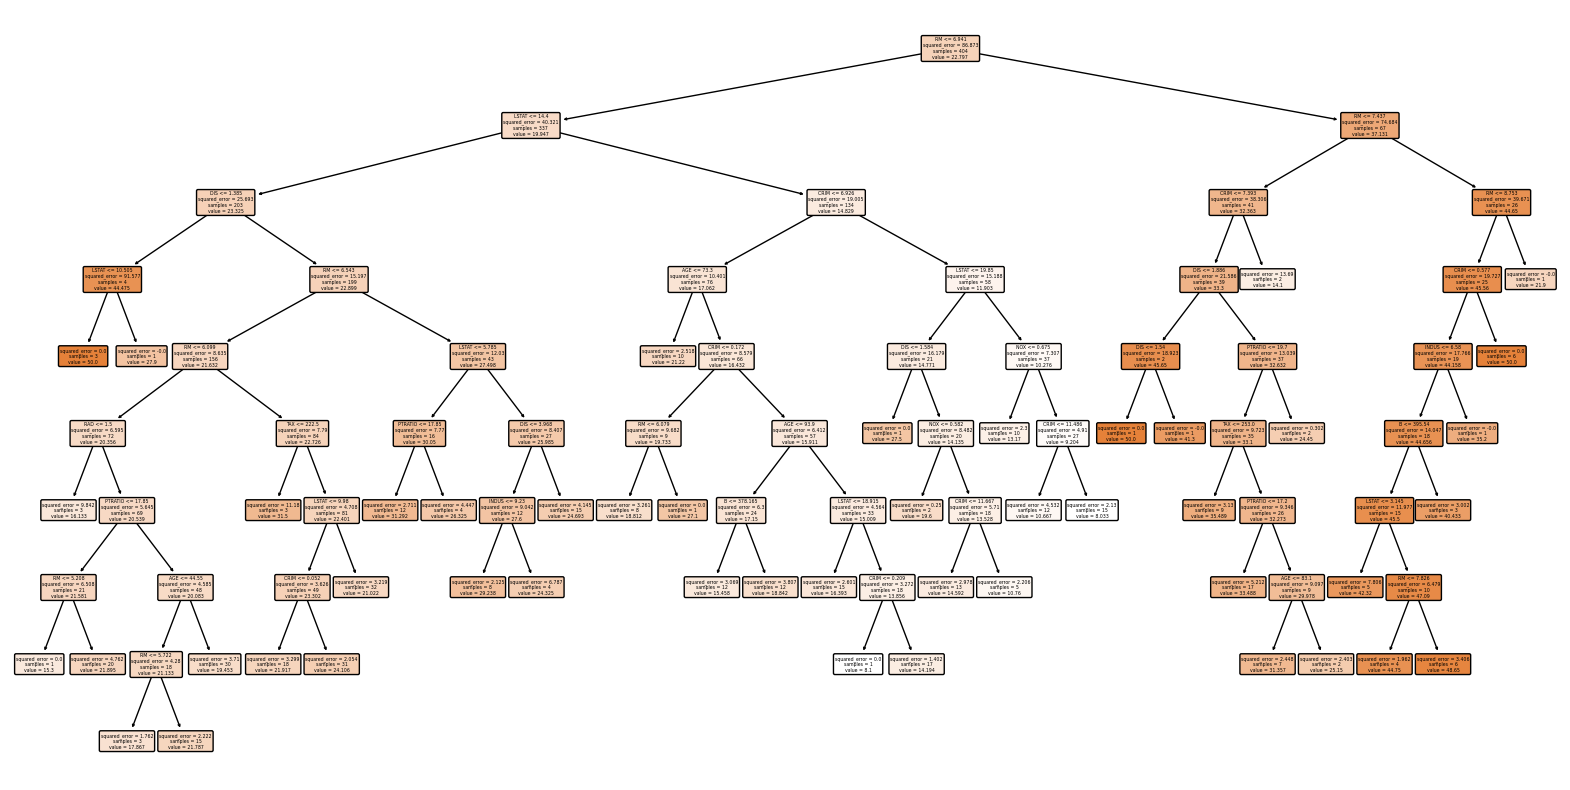

In [18]:
plt.figure(figsize=(20,10))
tree.plot_tree(best_tree, feature_names=feature_names, filled=True, rounded=True)
plt.show()